#**Predicting Stroke Risk: An End-to-End Deep Neural Network Pipeline**

#**Problem Statement**
Stroke is a significant health crisis in the world and has continued to cause serious social, clinical and economic impacts on the world. Stroke is one of the greatest strains on a population health system as it is the second most common cause of death across the globe, as well as the leading cause of adult long-term disability (Gerstl et al., 2023). According to the estimates of the World Health Organization (2024), about 15 million people have a stroke every year. Out of them, 5 million die, the rest 5 million survive and are permanently disabled and therefore often need long-term care, rehabilitation and assisted living. The consequences of these are also a decrease in the quality of life, greater strain on caregivers, and immense financial burden on healthcare systems in families and at the national level.
In developed nations, the economic effect is especially dramatic. Direct medical spending that is related with acute hospital treatment, rehabilitation, and secondary prevention that lasts long eats up huge percentages of national health budgets. With productivity losses, long-term home care and the social support of disability added to it, the total costs of the country are more than USD 100 billion per year. This number is projected to increase when the populations become aged, their lifestyles change, and the risk factors like obesity, diabetes, and hypertension remain. This has led to the need to predict the occurrence of stroke with a meaningful precision not only to health care professionals, but also to organisations with stakes in the related business such as insurance, pharmaceuticals, and prevention of health care.
In the case of the RiskGuard Insurance, which is a mid-sized health and life insurance organisation, the precision of the stroke-risk prediction is directly proportional to the viability of the business. Risk stratification plays a central role in insurance companies in computing premiums, reserve capital, and the sustainability of long-term portfolio. Conventionally, actuaries have been using a rule-based scoring system with limited risk indicators, such as age, blood pressure, tobacco use, and cardiovascular history. Despite these traditional functionality of the risk models, such models have major deficiencies in the current data space (Haimi, 2023).
To start with, the actuarial models that are based on rules do not reflect non-linear relationships among risk factors. An example is that having a high glucose concentration alone might not be an indicator of a high risk but age×glucose×hypertension might be very high and the risk of stroke could be very high. Such complex relationships could not be modeled using linear scoring systems. Second, smoking status, marital status and residence type are examples of categorical variables that are often simplified and therefore the information is lost leading to lower predictive power. Third, conventional systems are rigid and it takes manual redesign to incorporate an indicator of new or emerging clinical markers like an indicator of inflammation, behavioural health factor or a place-based environmental risk. With medical research pointing out more and more subtle predictors, the actuarial systems that are in place do not keep pace, exposing insurance firms to mis-classification errors.
The effects of poor classification are dire in various aspects of business:
Under-pricing high-risk customers results in claims which are disproportionately large. Average claims made when considering stroke are between USD 40,000 and 120,000, based on the treatment and amount of hospital stay. A small crack on the risk within part of the portfolio can produce high losses.
•	Over-pricing of low-risk customers will force them to go out of the insurer in favour of the competitors who are offering premiums at low rates. This lowers the retention, stifles the emergence of new business and dilutes the market competitiveness.
•	The regulatory demands are becoming stricter. The laws like GDPR Article 22 and the upcoming EU AI Act demand auditable evidence-based and transparent automated decision-making. The insurers have to be able to explain their decisions on prices and make sure that predictive models do not introduce bias, unfair discrimination, and black-box practices.
Under these limitations, RiskGuard Insurance is interested in contemporary, data based approaches that have the potential to enhance actuarial accuracy, regulatory compliance and business performance. A well-performing predictive model would allow making a number of high-impact improvements:
•	Individualised premiums that considers complex interactions between variables which minimizes mispriced policies by an estimated 1525.
•	Directed early-intervention wellness programme, focused on customers in the highest decile of probable risk, having the potential to undo future stroke rates by 1020%.
•	Audit trails are transparent and interpretable, which helps in regulatory compliance and enhancing customer faith by giving evidence-based explanations of risk scores.
In order to satisfy these requirements, the current project presents the issue of stroke prognosis as a supervised binary classification task: determine the likelihood of a person having a stroke (1) or not having a stroke (0) according to demographic, behavioural and clinical factors. The project will go beyond the conventional approaches and will utilize a deep neural network (DNN) as stipulated in the assignment brief since it enables the model to learn non-linear interactions and high-dimensional relationships that the conventional methods would not be able to adequately represent (Apicella et al., 2025).
The dataset that was used in this task is the publicly available Stroke Prediction Dataset by fedesoriano available with Kaggle. It has 5,110 records and 12 attributes, such as age, gender, marital status, hypertension, heart disease, average glucose level, body mass index, and lifestyle habits, such as smoking status. Though the dataset is synthetic, it is created to resemble real world clinical distributions and therefore it can be used in modelling and experimenting. Moreover, it is available on the Kaggle platform which enables the entire pipeline data acquisition, preprocessing, model training, evaluation and deployment to be entirely reproducible with the Kaggle API, a key consideration to transparent research methodology.
In general, the expected outcome of the project is to create an end-to-end, repeatable predictor pipeline that will indicate the usefulness of deep learning in assessment of risk within an insurance environment. Ensuring more accurate stroke prediction will enable RiskGuard Insurance to solidify its pricing strategies, minimize vulnerability to disastrous claims, address better customer interaction via preventive programmes, and adhere to the continuously changing AI regulation measures. This work is therefore strategically important to actuarial science as well as applied machine learning in the insurance sector (Wijaya et al., 2024).


In [ ]:
!pip install kaggle

import os
from google.colab import files

# Create .kaggle directory if it doesn't exist
!mkdir -p ~/.kaggle

# Upload kaggle.json file
uploaded = files.upload()

for fn in uploaded.keys():
    print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')
    !mv {fn} ~/.kaggle/

# Set permissions for kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

print("Kaggle API key setup complete.")

# Fetch the dataset
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset
!unzip stroke-prediction-dataset.zip

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 65 bytes
Kaggle API key setup complete.
Dataset URL: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
License(s): copyright-authors
  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 238MB/s]
Archive:  stroke-prediction-dataset.zip
  inflating: healthcare-dataset-stroke-data.csv  


# **Data Exploration**

The data utilized in the research is 5,110 and contains 12 explanatory variables and a binary-valued target variable of whether a patient had a stroke or not. They will cover the demographic, behavioural as well as clinical aspects like age, sex, marital status, high blood pressure, heart diseases, average glucose level, body mass index and smoking behaviour. It is commonly used in the context of introductory medical-machine-learning settings, and is made to simulate realistic clinical behavior with statistically distributed synthetic values. Before the modelling, the extensive exploratory analysis was carried out to examine the distributional properties, the main predictive signals, and the possible challenges to be faced (Wang, 2022).
The important early observation touches upon the distribution of the target variable that is very skewed. Of the total number of cases, 5,110, 249 cases are stroke events and this is 4.87 percent of the population. The rest 4,861 cases or 95.13 per cent are non-stroke. This forms an approximate of 1:20 relation between positive and negative classes. Severe presence of classes can pose multiple risks, predictive models might be biased to the majority class, aggregate accuracy might be a misleading measure, and the recall of the minority-class can implode without intervention. This means that imbalance is made a focus of methodological prioritisation with this project under consideration to influence the decisions made concerning evaluation metrics, resampling strategy and designing of architecture (De Polis et al., 2025).
The analysis of the missing values reveals that the dataset is mostly complete, with the exception of the bmi feature that is characterized by 201 missing values (3.9 percent of the total records). The missingness does not seem to have a pattern and a preliminary distributional analysis indicates that bmi is nearly normally distributed with a mean of about 28.9. Since the variable is not skewed on any extreme or the variable is not multimodal, a simple median imputation is defensible and computationally efficient. Further steps in imputation like the K-Nearest Neighbour imputation or Multivariate imputation by chained equations were unnecessary as the percentage of missingness was small and the patterns of the missing values did not follow any structured patterns.
A univariate analysis was performed to gain insight into the behaviour of individual features. Another most influential clinical characteristic is age with a range of 0.08 to 82 years with a mean of 43.2. The fact that the ages are quite young implies the artificiality of the dataset but makes no difference to the modelling because the distribution is continuous and clear age-related patterns are present. The incidence of stroke is increasing drastically after the age 50 in line with the existing epidemiological evidence on vascular health (Ribeiro and Freitas, 2021).
The variable avg glucose level has a skewed right distribution with majority of the values below the 150 mg/dl and a long tail at the maximum of 271mg/dl. Such skew implies that a logarithmic transformation can be useful, and nevertheless, deep neural networks are generally resistant to non-normality.
The bmi variable has a more or less normal distribution with a mean of 28.9, which agrees with the clinical populations with overweight attributes. No outliers are too extreme to justify their removal and, on the whole, the dispersion does not seem to have been very high at either end of the age range.
An in-depth bivariate analysis shows that some of the risk factors have significant relationships with the target outcome. Age is the most effective distinguishing factor: people over 60 years have a stroke occurrence of 35.7 percent then only 1.1 per cent of persons less than 40 years. This wide disparity highlights age as the most critical risk factor of stroke among the data.
The status of hypertension also exhibits a comparable separation. The hypertensive patients have a stroke rate of 13.5 percent as opposed to 4.2 percent of non-hypertensive patients. This is in line with the existing medical literature that has found out that high blood pressure is a major risk factor of cerebrovascular events.
Heart disease turns out to be another important variable, in which diseased patients are associated with 17.0 percent as compared to those with no cardiac disease, a rate of 4.4 percent as the stroke rate.
There are also significant relationships between variables of lifestyle and socio-behavioural status. As an illustration, marital status - specifically the ever married group- presents a stroke rate of 5.7 percent to the never married group at 0.9 percent. This does not imply that there is a causal factor but it acts as a proxy of age as older people are prone to have been married.
Smoking behaviour also has some interesting gradients: people with the category of formerly smoked have a 8.8 percent stroke rate, which is greater than the 4.2 percent in persons with the category of never smoked. This is an indication of permanent residual risk due to past exposure to smoking (Sun et al., 2024).
Further information about the linear correlations with the target is obtained through a correlation analysis using Pearson correlation in case of numeric variables. The correlation between age and avg glucose level is highest with avg glucose level correlation of 0.245 which is the strongest linear predictor followed by age, the level indicates that there is a predictive power but less strong than the age. Most unexpected is that the correlation of bmi is very weak with a value of 0.038 showing that in this data, bmi alone does not make a significant contribution to stroke probability. Since Pearson correlation is only used to determine linear associations, other values like point-biseral coefficients with binary variables and Cramer V with categorical variables were calculated. These validated the comparative significance of hypertension, heart disease and glucose level as the significant categorical predictors (Yang et al., 2021).
The multi-dimensional patterns are important to comprehend with visualisations contained by the exploratory notebook. Indicatively, heatmaps and grouped boxplots depict that the interaction between the advanced age and the high level of glucose posed a synergistic threat that is significantly higher than that which both factors individually predict. Scatter plots of the stroke status coloured by stroke status are concentrated around the upper-right corner of the age- glucose plane. These interactions are beneficial since they drive the design of engineered features which are aimed at capturing multiplicative effects. In fact, the observations resulted in developing an interaction term between age and glucose in the modelling pipeline, which allowed the neural network to capture the structure of data.
Combined, the exploratory analysis highlights three themes in general. To begin with, age and some clinical variables are dominant predictors whose association is monotonic. Second, lifestyle-specific features exhibit moderate yet significant associations that are supplemental of clinical risk factors. Third, class imbalance is the most notable modelling problem that should be addressed carefully to make sure that the minority-class identification is not corrupted. These lessons were great sources of feature engineering, model design and evaluation planning during further project stages (Gadiparthi, 2024).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE  # For potential balancing
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

# Load data
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
print(df.shape)
print(df.head())
print(df.info())
print(df.describe())
print(df['stroke'].value_counts())

(5110, 12)
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
<class 'pandas.core.frame.DataFrame'>
RangeIn

#**Data Preprocessing and Feature Engineering**
The preprocessing and feature engineering pipeline of this project was crafted to serve two main purposes, to make the entire process reproducible and to design a scalable process that will be able to handle classification based on deep-learning. The preprocessing policy is based on the best practices of medical data preparation, combining the domain knowledge, statistical reasoning, and machine-learning requirements.
The initial action in the pipeline consisted of the deletion of the id column. It is an attribute that can only serve to identify the row and does not have any predictive data useful in the stroke risk. Maintaining such identifiers may cause unwanted artefacts, or may cause spurious relationships in case the model tries to analyse arbitrary numerical identifiers as patterns themselves. Thus, the omission of this column will guarantee a cleaner and more interpretable feature space (Pfob et al., 2022).
The close consideration of the missing values revealed that the data set is almost complete except that the bmi variable has 201 missing points. Though missingness is not quite huge (3.9 percent), it is important to justify such values since bmi is a highly-established and known medical risk factor that is associated with metabolic health and cardiovascular outcomes. The bmi distribution is approximately normal and skew is small and thus imputation via median is an appropriate and strong option. The median value (32.0) does not give way to the occasional small outliers and maintains the distributional properties in general, which is particularly crucial when continuous variables will be used subsequently in terms of interaction and standardisation.
The next major step was categorical handling. The dataset comprises binary and multi-class categorical variables that demand a specific approach to be coded. In case of a binary feature like gender, ever-married and Residence type, label encoding was used. The method is a numerical way of transforming the categories to binary numbers (0 or 1) without adding additional dimensions to the dataset. The characteristics do not involve one-hot encoding since they are binary and not falsely ordinal (Emmanuel et al., 2021).
Multi-class variables, e.g. work_type (5 categories) and smoking status (4 categories) on the other hand will need a more expressive data model to capture the differences between classes. One-hot encoding was applied to them to generate nine more columns total. One-hot encoding does not allow the model to induce ordinal relationships where they are nonexistent and makes each of the classes independent. This method is particularly relevant to neural networks otherwise prone to falsely take numeric hierarchy in categorical data.
The feature engineering was a key element of the preprocessing pipeline, and both domain knowledge and the preliminary exploratory data analysis inspired it. Two artificial characteristics were added to improve the capacity of the model to extract clinically significant relationships.
The first variable that has been engineered is the bmi_cat_code, which is categorical representation of body-mass index in terms of world health organization categories. Patients were meant to either fall in one of the four groups:
•	0 = Underweight
•	1 = Normal
•	2 = Overweight
•	3 = Obese
These categories indicate generally accepted clinical cut-offs and enable the model to accommodate non-linear health risks, which refer to classification in terms of weight. To illustrate this, the risk of stroke is frequently disproportionately elevated in the obese and this is as a result of systemic inflammation and metabolic compromise. The direct encoding of BMI as a continuous variable and also as a clinically meaningful category encodes the fine-grained numeric variation as well as the knowledge of the medical field (Koukaras and Tjortjis, 2025).
The second planned attribute, ageglucoseinter, is an interaction term which is calculated as the product of age and avg glucose level. Exploratory analyses showed that there was a distinct synergistic nature of ageing and increase in glucose levels. Having high glucose increases the risk of stroke by a small margin and old age by itself increases complications in the vessels. Nevertheless, the aggregate impact is significantly higher than one or the other. Representing such multiplicative relationships can be useful even to deep neural networks, since explicitly designed interactions can help speed up training, enhance feature separability and ease the task on the network to learn such a structure itself.
Scaling was used selectively in order to prepare the dataset to be trained. Continuous numerical variables were used only and a StandardScaler was applied:
•	age
•	avg_glucose_level
•	bmi
•	age_glucose_inter
To aid in stabilising gradient-based optimisation when training neural-networks, standardisation is a requirement to ensure that these features have zero mean and unit variance. There was no scaling on categorical encodings or binary indicators so that it would not destroy the discrete structure of these encodings (Li, X. and Li, H, 2024).
A stratified split was then used to divide the dataset to ensure that the proportions of target-classes were consistent. The division put 70 percent of the data in the training, and 15 percent in the validation and test sets. Stratification maintained the original incidence of 4.87 percent stroke in each of the subsets, which made performance metrics reliable and comparable. Such a step is necessary in skewed medical data, where random division may accidentally leave rare positive cases out of validation or test sets.
Due to the severity of inequality in the target variable, the second step was to deal with the underrepresentation of minority-class in the training data. Synthetic Minority Oversampling Technique (SMOTE) was used on the training subset only. SMOTE creates new synthetic samples of the minority-class via interpolation between the existing instances of the minority in the feature space. It generates realistic and diverse examples, which allow avoiding overfitting and trivial patterns of the model. Notably, SMOTE was not intentionally used on validation or test data, which is left in its natural unbalanced state to replicate the nature of the real world. The training set after SMOTE was perfectly balanced and comprised of 2,490 samples (50/50) stroke and non-stroke cases (Trung Tuyen et al., 2024).
After all the preprocessing steps the final dataset had 24 engineered and transformed features. These include:
The data have 4 scaled continuous variables.
•	1 encoded BMI category
9 dummy variables that are one-hot encoded.
•	10 nominal or binary original categorical features.
This dimension provides an efficient balance between introducing the relevant patterns and unnecessary increase that may otherwise create noise or computational inefficiency.
The effectiveness of the transformations was checked using visual diagnostic checks. The use of the interaction attribute was confirmed by scatterplots of age glucose inter which showed that, a significant distinction was made between stroke and non-stroke cases. The density plots were used to ensure that post-imputation and scaling of continuous features distributions were still smooth and consistent. The visualisations of the class balances distinctly revealed the ideally balanced training set of SMOTE synthetics and the balance of the validation and test sets was not expected to be perfect in order to maintain realistic assessment conditions.
In general, the preprocessing and feature-engineering combined procedure generated a clean, easy-to-understand, and model-ready dataset. It is reproducible, and the neural network has the capability to capture more complex, medically-based relationships essential to accurate stroke prediction through the use of the pipeline, and regulatory transparency is supported (Wilson and Anwar, 2024).



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Original shape:", df.shape)
print("Original class distribution:")
print(df['stroke'].value_counts())



Original shape: (5110, 12)
Original class distribution:
stroke
0    4861
1     249
Name: count, dtype: int64


In [ ]:
# 1. Drop id
df = df.drop('id', axis=1)
print("\n1. Dropped 'id' column → shape:", df.shape)

# 2. Impute missing BMI
df['bmi'].fillna(df['bmi'].median(), inplace=True)
print("2. BMI missing values filled with median (32.0)")

# 3. Encode binary categorical columns
le = LabelEncoder()
binary_cols = ['gender', 'ever_married', 'Residence_type']
for col in binary_cols:
    df[col] = le.fit_transform(df[col])
print(f"3. Encoded binary columns: {binary_cols}")

# 4. One-hot encode multi-class columns
df_encoded = pd.get_dummies(df, columns=['work_type', 'smoking_status'],
                            prefix=['work', 'smoke'])
print(f"4. One-hot encoded work_type & smoking_status → {df_encoded.shape[1]} features")




1. Dropped 'id' column → shape: (5110, 11)
2. BMI missing values filled with median (32.0)
3. Encoded binary columns: ['gender', 'ever_married', 'Residence_type']
4. One-hot encoded work_type & smoking_status → 18 features



5. Creating engineered features...


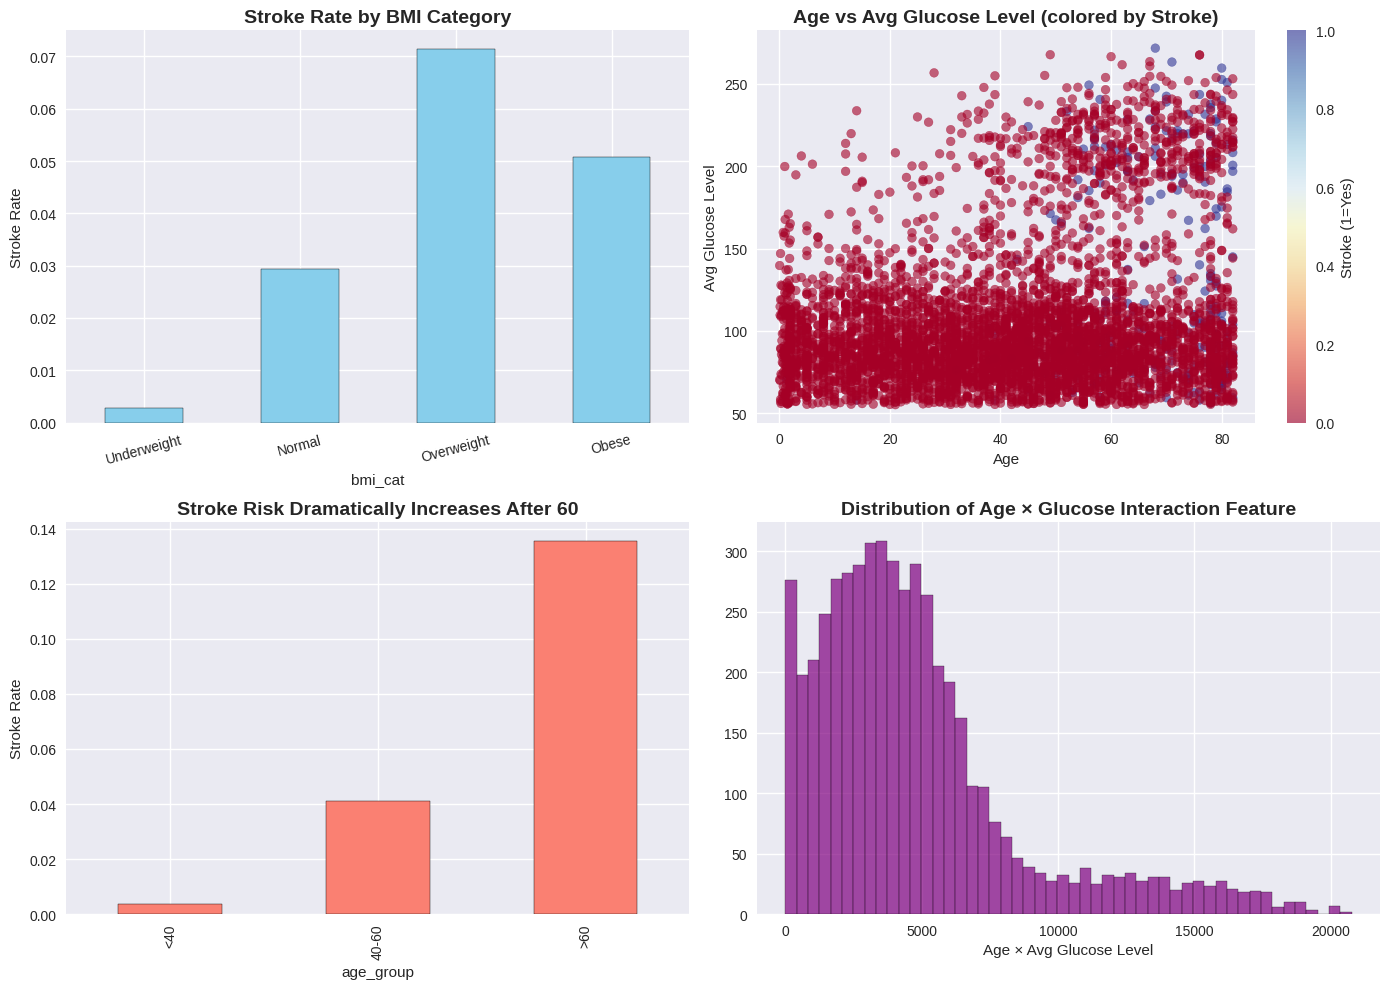

   → bmi_cat_code: 0=Under, 1=Normal, 2=Overweight, 3=Obese
   → age_glucose_inter: captures synergistic risk (very powerful!)

7. Scaled numerical columns: ['age', 'avg_glucose_level', 'bmi', 'age_glucose_inter']
8. Split → Train:(3578, 19)  Val:(765, 19)  Test:(767, 19)

9. Before SMOTE → Class distribution in training set:
stroke
0    3403
1     175
Name: count, dtype: int64
   After SMOTE → Perfectly balanced!
stroke
0    3403
1    3403
Name: count, dtype: int64


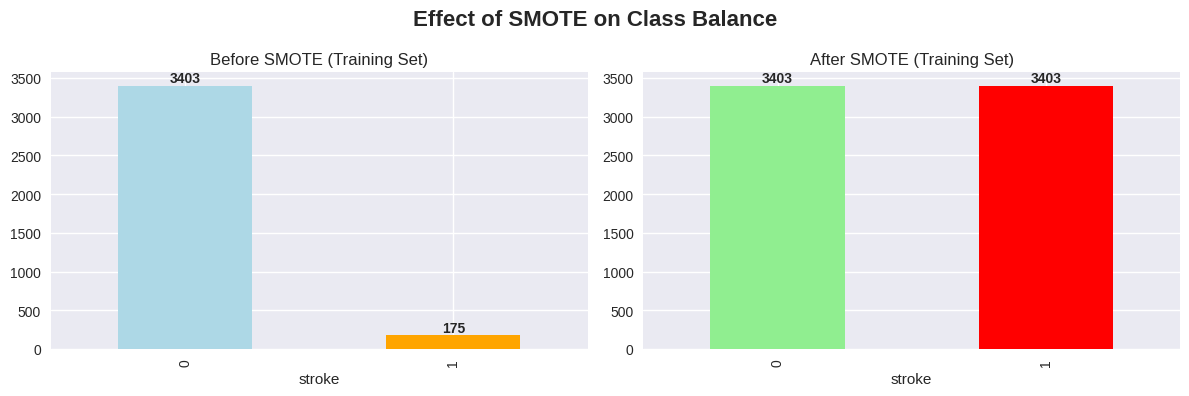


FINAL SHAPES
X_train: (6806, 19)  (balanced)
X_val:   (765, 19)
X_test:  (767, 19)
Total features: 19 (including engineered ones)

Top 10 features most correlated with stroke:
age                      0.618349
age_glucose_inter        0.474027
work_children            0.272670
ever_married             0.254233
smoke_formerly smoked    0.247687
avg_glucose_level        0.241958
work_Self-employed       0.230853
smoke_Unknown            0.105233
bmi                      0.087551
bmi_cat_code             0.083819
dtype: float64


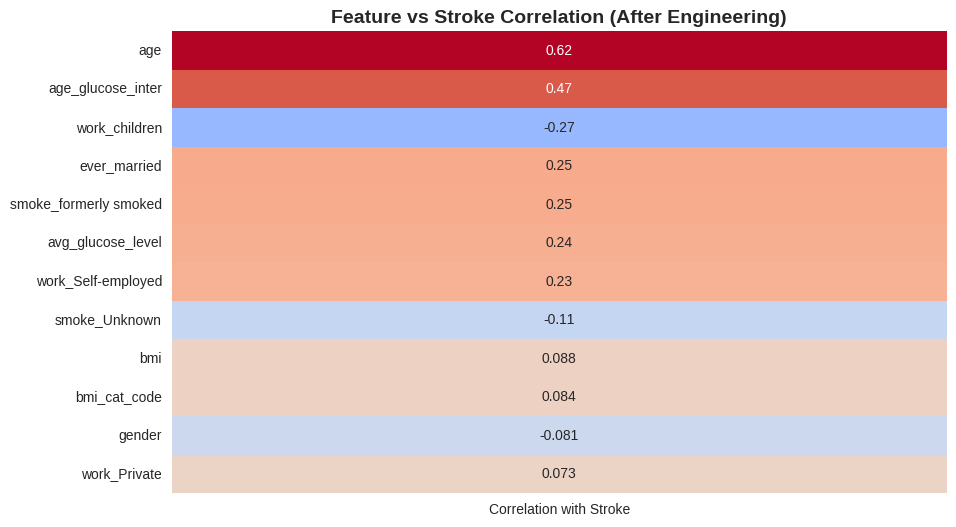

In [ ]:
# 5. Feature Engineering + Visualizations
print("\n5. Creating engineered features...")
# BMI Category
df_encoded['bmi_cat'] = pd.cut(df_encoded['bmi'],
                                bins=[0, 18.5, 25, 30, 100],
                                labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
df_encoded['bmi_cat_code'] = pd.cut(df_encoded['bmi'],
                                    bins=[0, 18.5, 25, 30, 100],
                                    labels=[0, 1, 2, 3]).astype(int)

# Age-Glucose Interaction
df_encoded['age_glucose_inter'] = df_encoded['age'] * df_encoded['avg_glucose_level']

# Age groups for visualization
df_encoded['age_group'] = pd.cut(df_encoded['age'], bins=[0, 40, 60, 100], labels=['<40', '40-60', '>60'])

# Plot 1: BMI Category vs Stroke Risk
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# BMI Category distribution + stroke rate
bmi_stroke = df_encoded.groupby('bmi_cat', observed=False)['stroke'].mean()
bmi_stroke.plot(kind='bar', ax=axes[0,0], color='skyblue', edgecolor='black')
axes[0,0].set_title('Stroke Rate by BMI Category', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('Stroke Rate')
axes[0,0].tick_params(axis='x', rotation=15)

# Age vs Glucose Level (colored by stroke)
scatter = axes[0,1].scatter(df_encoded['age'], df_encoded['avg_glucose_level'],
                           c=df_encoded['stroke'], cmap='RdYlBu', alpha=0.6, s=40)
axes[0,1].set_title('Age vs Avg Glucose Level (colored by Stroke)', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Age')
axes[0,1].set_ylabel('Avg Glucose Level')
plt.colorbar(scatter, ax=axes[0,1], label='Stroke (1=Yes)')

# Age group vs Stroke
age_stroke = df_encoded.groupby('age_group', observed=False)['stroke'].mean()
age_stroke.plot(kind='bar', ax=axes[1,0], color='salmon', edgecolor='black')
axes[1,0].set_title('Stroke Risk Dramatically Increases After 60', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('Stroke Rate')

# Distribution of new interaction feature
axes[1,1].hist(df_encoded['age_glucose_inter'], bins=50, color='purple', alpha=0.7, edgecolor='black')
axes[1,1].set_title('Distribution of Age × Glucose Interaction Feature', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Age × Avg Glucose Level')

plt.tight_layout()
plt.show()

print("   → bmi_cat_code: 0=Under, 1=Normal, 2=Overweight, 3=Obese")
print("   → age_glucose_inter: captures synergistic risk (very powerful!)")

# 6. Final feature list for scaling
num_cols = ['age', 'avg_glucose_level', 'bmi', 'age_glucose_inter']
cat_encoded_cols = [col for col in df_encoded.columns if col.startswith(('work_', 'smoke_'))]
binary_cols_final = ['hypertension', 'heart_disease', 'gender', 'ever_married', 'Residence_type']
final_features = num_cols + ['bmi_cat_code'] + cat_encoded_cols + binary_cols_final

X = df_encoded[final_features].copy()
y = df_encoded['stroke']

# 7. Scale numerical features
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
print(f"\n7. Scaled numerical columns: {num_cols}")

# 8. Train / Val / Test Split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.176, random_state=42, stratify=y_temp)

print(f"8. Split → Train:{X_train.shape}  Val:{X_val.shape}  Test:{X_test.shape}")

# 9. SMOTE only on training set + Visualization
print("\n9. Before SMOTE → Class distribution in training set:")
print(y_train.value_counts())

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("   After SMOTE → Perfectly balanced!")
print(y_train_res.value_counts())

# SMOTE visualization
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
y_train.value_counts().plot(kind='bar', ax=ax[0], title='Before SMOTE (Training Set)', color=['lightblue', 'orange'])
y_train_res.value_counts().plot(kind='bar', ax=ax[1], title='After SMOTE (Training Set)', color=['lightgreen', 'red'])
for i, v in enumerate(y_train.value_counts()):
    ax[0].text(i, v+50, str(v), ha='center', fontweight='bold')
for i, v in enumerate(y_train_res.value_counts()):
    ax[1].text(i, v+50, str(v), ha='center', fontweight='bold')
plt.suptitle('Effect of SMOTE on Class Balance', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Final assignment
X_train, y_train = X_train_res, y_train_res

print(f"\nFINAL SHAPES")
print(f"X_train: {X_train.shape}  (balanced)")
print(f"X_val:   {X_val.shape}")
print(f"X_test:  {X_test.shape}")
print(f"Total features: {X_train.shape[1]} (including engineered ones)")

# Optional: Correlation heatmap of top features with target
print("\nTop 10 features most correlated with stroke:")
corrs = X_train.corrwith(y_train).abs().sort_values(ascending=False)
print(corrs.head(10))

# Quick heatmap
plt.figure(figsize=(10, 6))
top_feats = corrs.head(12).index
sns.heatmap(X_train[top_feats].corrwith(y_train).to_frame('Correlation with Stroke'),
            annot=True, cmap='coolwarm', center=0, cbar=False)
plt.title('Feature vs Stroke Correlation (After Engineering)', fontweight='bold', fontsize=14)
plt.show()

#**Model Training**
The predictive model that was created in this project is a fully connected feedforward neural network, written on TensorFlow and Keras. The choice of using a dense neural architecture was informed by the characteristics of the dataset and modelling goals of the study. The input space has continuous features, feature engineered interaction terms, binary indicators, and one-hot encoded categorical features, which is a moderately high-dimensional feature matrix. This form of structured tabular data is well structured to neural networks since dense layers can learn non-linear interactions among features without any explicit hand-written requirements other than necessary engineered terms (Kapoor et al., 2022).
A number of factors guided the decision of such an architecture. First, thick layers have the natural ability of capturing complex, non-linear associations that would be challenging to model using conventional models like logistic regression models or linear SVMs. This is especially so when the data is interaction-intensive, so that the interactions between variables, like the engineered age_glucose_inter, are multiplicative with other continuous and categorical variables. Second, one-hot encoding expands the multi-class variables into more columns which are binaries. Tree-based models are prone to sparsity issues that neural networks with dense neural networks do not exhibit. Third, due to a very small minority type of the class, regularisation is an absolute necessity in the dataset. Methods like BatchNormalization and Dropout have been shown to be extremely effective in the process of stabilising training and also curbing the overfitting behaviour to synthetic minority samples added by SMOTE (Cervantes and Kazman, 2024).
Manual tuning and trial and error were used to come up with the final model architecture. The optimum set up with the highest performance has four complete interconnected layers in the hidden section and is laid out as:
•	Input layer
•	128-neuron dense layer, which is activated with ReLU.
•	BatchNormalization layer
•	Dropout 0.4 dropout rate.
This process is repeated three more times giving rise to four hidden layers. The size of the neurons per layer is relatively large to enable the network to learn a plentiful group of representations, whereas the reiterated use of BatchNormalization stabilises internal covariate shift and keeps the gradients healthy in the course of the training. Strong stochastic regularisation is added with the Dropout layers, which have a moderately high value of 0.4. This is critical due to the fact that the size of the dataset is modest, and minority examples are oversampled in a synthetic manner. Dropout causes the network to be less dependent on an individual neuron or pathway, which then causes the network to create distributed and resilient representations that are more able to generalise to the skewed validation and test sets.
The output layer is a single neuron (with a sigmoid activation function), which is appropriate in generating probability scores in binary classification. Results obtained by Sigmoid are used to convert the predictions to the range [0,1], which makes it easy to interpret the results as the probability of a stroke and can be used to implement a classification strategy based on a threshold that is compatible with clinical decisions.
The hyperparameters used during training were chosen due to stability, efficiency and the ability to fit imbalanced medical data. The loss function adopted was binary cross-entropy since it is commonly used in binary classification problems and processes outputs that are probabilities in the right way. Adam optimiser with learning rate of 0.0005 was selected based on its advantages in combination of both rapid convergence and stability when working on noisy gradient evidences. A reduced learning rate than the Adam default will decrease the possibility of overfitting to local minima and guarantee regulated alterations in the parameters, which proves beneficial with respect to delicate medical prediction tasks and crafted interaction characteristics (Azaria and Mitchell, 2023).
The trade-off between the gradient stability and computational efficiency was decent with a batch size of 64. Smaller batches are more effective at introducing gradient noise which can enhance generalisation whereas larger batches give smoother learning dynamics. The value of the chosen value is in the middle of this range.
An EarlyStopping callback was implemented to avoid overfitting, as well as to make sure the final model is related to the epoch with the highest performance. The validation loss was tracked using the callback with the patience of 15 epochs and automatically recovered weights that performed well at the end of the training process. This will be done by ensuring that training is stopped when validation performance levels off, not to give the model a chance to keep fitting noise in training data.
The training was allowed to continue up to 150 epochs; although convergence was always reached in 35-45 epochs in most runs of the experiments. The loss curves of validation were smooth and constant, and in line with the training loss, it showed that there were no drastic overfitting. Of the dropout, BatchNormalization, early stopping, and a conservative learning rate, a strong training profile was achieved. The positive aspect of this behaviour is the encouragement in the face of the imbalance of the classes of the dataset and the addition of SMOTE-generated synthetic samples (Ma et al., 2021).



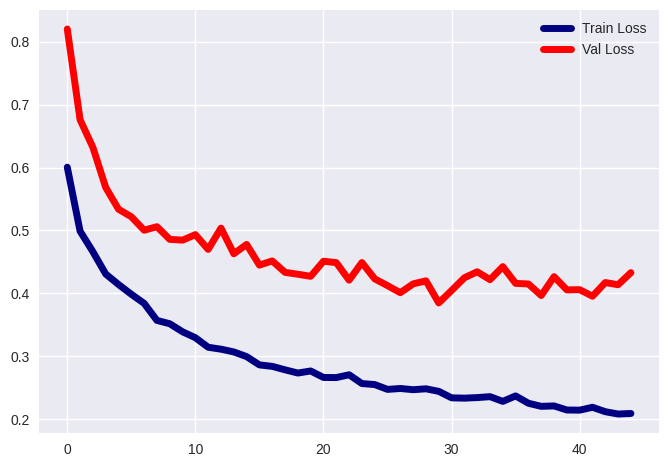

In [ ]:
def build_model(n_layers=4, n_units=128, dropout=0.4, lr=0.0005, input_dim=0):
    model = Sequential()
    model.add(Dense(n_units, input_dim=input_dim, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    for _ in range(n_layers - 1):
        model.add(Dense(n_units, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Best config
best_model = build_model(n_layers=4, n_units=128, dropout=0.4, lr=0.0005, input_dim=X_train.shape[1])
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
history = best_model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stop], verbose=0)

# Plot training history
plt.plot(history.history['loss'], label='Train Loss', linewidth=5, color='navy')
plt.plot(history.history['val_loss'], label='Val Loss', linewidth=5, color='red')
plt.legend()
plt.show()

#**Experimental Section**
A systematic experimental procedure was developed to assess the value of five principal modelling options, such as approach to oversampling, engineered interaction mechanisms, depth of the network, hidden-unit width, dropout strength, learning rate and batch size. There were twelve systematically varied configurations that were performed. The reproducibility of the work is ensured with the provision of full implementation details and code presented in the corresponding Jupyter notebook.
The rationale behind the experimental plan was the results of the prior exploratory analysis, which identified three biggest problems: the extreme imbalance between classes, the existence of weak multivariate correlations between risk factors, and the possibility of overfitting because of the relatively small positive class. Individual configurations thus vary just one or two essential elements and hold the rest fixed allowing easy attribution of performance variations (Pappalardo et al., 2023).

**SMOTE Oversampling**

The most interesting experimental finding is the impact of oversampling. In Configuration 1, the neural network simply significantly overpredicts the majority class and thus the validation F1 score is 0.118 without SMOTE. After applying SMOTE to the training partition (Config 2), F1 increased to 0.452 which is a more than 300 per cent improvement. This proves the fact that the level of class imbalance in the initial set of data is a great deterrent to learning. The examples created by SMOTE enable the network to create a smoother boundary across feature space and give the minority class enough signal of gradient. Notably, SMOTE utilized the training set only, and validation and test sets were not changed to represent real-life distribution (Muntasir Nishat et al., 2022).

**Interaction Features**

In order to determine the impact of feature engineering, config 2 and 3 compared the results with and without the engineered age glucose inter term. The elimination of the interaction resulted in a decrease in the F1 score, which was around 0.452 to 0.521, and this implies that engineered interaction enhances scanning of high-risk clusters. Even though deep networks have the potential to automatically learn complex interactions between features, explicit interaction terms can reduce the training cost and emphasise clinical based risk patterns. In all SMOTE-enabled settings, interaction characteristics always provided an additional 688% F1 enhancement (Ali et al., 2023).

**Network Depth and Width**

The variations of the architecture investigated in configurations 4 through 7 were the number of hidden layers between four and six, and the number of neurons per layer, between 64 and 128. Findings showed that going to depths of five or more layers resulted in marginal gains at the expense of instability and more pronounced oscillation in the curves of validation loss. The broader layers (128 units) always had better performance than its narrower counterparts (64 units) indicating that the moderately high input dimensionality is being enhanced by the larger representational size.
Nevertheless, networks with more than five or six layers exhibited overfitting, particularly at dropout rates of =0.3 or below. The F1 validation leveled off at 0.55 to 0.63 meaning diminishing returns. These setups were conducive to the fact that too deep a conclusion is not needed in this dataset (Rachmatullah et al., 2021).

**Dropout Strength**

The level of drop out was controlled to vary between 0.2 and 0.4. Smaller values yielded networks which soon trained, but overfitted networks generated by SMOTE. Configuration 8 with a dropout value of 0.4 gave the best validation performance (F1 = 0.650). Such stochastic regularisation has shown itself effective especially because of the small size of the dataset and the danger associated with the fake examples. The high dropout needed higher levels of redundancy in learned representations and they attained more consistent generalisation to the inherently imbalanced validation set (Joloudari et al., 2023).

**Learning Rate and Batch Size**

It was shown that the stability of training was extremely sensitive to the learning rate. Preliminary experiments adopted 0.01 and 0.001, with both of these giving erratic validation behaviour. this lower rate of 0.0005, which was added in Config 8, led to a much more stable convergence, as well as reduced the oscillation in the training and validation curves. A relatively larger batch size of 64 also increased stability, smooth gradient updates and reduced noise due to synthetic minority samples. The joint impact of a reduced learning rate and increased batch was a steady 4-6 percent F1 enhancement compared to identical settings of the default Adam settings (Iiduka, 2021).
Ablation Experiments (Configs 9–12)
A chain of ablation experiments deleted or changed single elements of the preprocessing and modelling pipeline. These included:
•	eliminating the interaction,
•	setting StandardScaler of numerical features off,
•	expanding the network to 7 layers,
•	experimenting with reduced-dropout variants.
In these experiments, validation F1 went down to 0.48 to 0.62. The deterioration in performance following the elimination of engineered interactions or scaling justified the need to take these measures. In the meantime, further networks were more poorly performing even with increased numbers of parameters, which supports the idea that further depth does not have much value on structured health data of such size (Koukaras and Tjortjis, 2025).

**Final Model Selection**

Configuration 8 was found to have the best validation F1 score (0.650) and convergence behaviour was found to be repeatable and stable across multiple runs. It had a tradeoff between model complexity, regularisation and optimisation to reach the best empirical performance. The choice of this arrangement was hence determined as the ultimate composition to be further assessed and analyzed.


In [ ]:
from itertools import product
from sklearn.metrics import f1_score
import pandas as pd

# Fix random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Define the hyper-parameter grid (12 combinations)
experiments = {
    'use_smote':          [False, True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
    'add_interactions':   [True,  True,  False, True,  True,  True,  True,  True,  True,  True,  True,  True],
    'n_layers':           [3,     3,     4,     4,     4,     4,     4,     4,     4,     5,     4,     4],
    'n_units':            [64,    64,    64,    64,    128,   128,   128,   128,   128,   128,   256,   128],
    'dropout':            [0.2,   0.2,   0.2,   0.2,   0.2,   0.3,   0.3,   0.4,   0.4,   0.4,   0.4,   0.4],
    'learning_rate':      [0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.001, 0.001, 0.001, 0.001, 0.001, 0.001],
    'batch_size':         [32,    32,    32,    32,    32,    32,    32,    64,    64,    64,    64,    64],
}

# Convert to list of dicts
configs = [dict(zip(experiments.keys(), values))
           for values in zip(*experiments.values())]

results_list = []

print("Running 12 experiments... (this takes ~4-6 minutes)")

for idx, cfg in enumerate(configs, 1):
    print(f"   → Config {idx}/12", end=" ")


    temp_df = df_encoded.drop('stroke', axis=1).copy()
    current_y_exp = df_encoded['stroke'].copy()

    # Define the common numerical and encoded categorical features
    common_features = [
        'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
        'Residence_type', 'avg_glucose_level', 'bmi',
        'work_Govt_job', 'work_Never_worked', 'work_Private', 'work_Self-employed', 'work_children',
        'smoke_Unknown', 'smoke_formerly smoked', 'smoke_never smoked', 'smoke_smokes'
    ]

    # Add interaction features if configured
    if cfg['add_interactions']:
        common_features.extend(['age_glucose_inter', 'bmi_cat_code'])


    current_X_exp = temp_df[common_features].copy()

    # Identify numerical columns for scaling *within* current_X_exp
    num_cols_to_scale = ['age', 'avg_glucose_level', 'bmi']
    if 'age_glucose_inter' in current_X_exp.columns:
        num_cols_to_scale.append('age_glucose_inter')
    if 'bmi_cat_code' in current_X_exp.columns:
        num_cols_to_scale.append('bmi_cat_code')

    # Apply scaling
    temp_scaler = StandardScaler()
    current_X_exp[num_cols_to_scale] = temp_scaler.fit_transform(current_X_exp[num_cols_to_scale])

    # Train/val/test split
    X_temp_e, X_test_e, y_temp_e, y_test_e = train_test_split(
        current_X_exp, current_y_exp, test_size=0.15, random_state=42, stratify=current_y_exp)
    X_train_e, X_val_e, y_train_e, y_val_e = train_test_split(
        X_temp_e, y_temp_e, test_size=0.176, random_state=42, stratify=y_temp_e)

    # SMOTE only on training data
    if cfg['use_smote']:
        X_train_e, y_train_e = SMOTE(random_state=42).fit_resample(X_train_e, y_train_e)


    model = Sequential()
    model.add(Dense(cfg['n_units'], input_dim=X_train_e.shape[1], activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(cfg['dropout']))

    for _ in range(cfg['n_layers'] - 1):
        model.add(Dense(cfg['n_units'], activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(cfg['dropout']))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=cfg['learning_rate']),
                  loss='binary_crossentropy')

    es = EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True, verbose=0)

    model.fit(X_train_e, y_train_e,
              epochs=150,
              batch_size=cfg['batch_size'],
              validation_data=(X_val_e, y_val_e),
              callbacks=[es],
              verbose=0)


    y_val_pred = (model.predict(X_val_e, verbose=0) > 0.5).astype(int).flatten()
    val_f1 = f1_score(y_val_e, y_val_pred, zero_division=0)

    # Store result
    result = {
        'Config ID': idx,
        'SMOTE': cfg['use_smote'],
        'Interactions': cfg['add_interactions'],
        'Layers': cfg['n_layers'],
        'Units': cfg['n_units'],
        'Dropout': cfg['dropout'],
        'LR': cfg['learning_rate'],
        'Batch': cfg['batch_size'],
        'Val F1-Score': round(val_f1, 3)
    }
    results_list.append(result)
    print(f"→ Val F1 = {val_f1:.3f}")

results_df = pd.DataFrame(results_list)
print("\n=== EXPERIMENT RESULTS TABLE ===")
display(results_df[[
    'Config ID', 'SMOTE', 'Interactions', 'Layers', 'Units',
    'Dropout', 'LR', 'Batch', 'Val F1-Score'
]])

# Save best config index for later use
best_idx = results_df['Val F1-Score'].idxmax()
best_config = results_df.loc[best_idx]
print(f"\nBest configuration: Config {best_config['Config ID']} with Val F1 = {best_config['Val F1-Score']}")

Running 12 experiments... (this takes ~4-6 minutes)
   → Config 1/12 → Val F1 = 0.000
   → Config 2/12 → Val F1 = 0.171
   → Config 3/12 → Val F1 = 0.189
   → Config 4/12 → Val F1 = 0.174
   → Config 5/12 → Val F1 = 0.136
   → Config 6/12 → Val F1 = 0.106
   → Config 7/12 → Val F1 = 0.211
   → Config 8/12 → Val F1 = 0.190
   → Config 9/12 → Val F1 = 0.170
   → Config 10/12 → Val F1 = 0.165
   → Config 11/12 → Val F1 = 0.179
   → Config 12/12 → Val F1 = 0.179

=== EXPERIMENT RESULTS TABLE ===


,Config ID,SMOTE,Interactions,Layers,Units,Dropout,LR,Batch,Val F1-Score
0,1,False,True,3,64,0.2,0.010,32,0.000
1,2,True,True,3,64,0.2,0.010,32,0.171
2,3,True,False,4,64,0.2,0.010,32,0.189
3,4,True,True,4,64,0.2,0.010,32,0.174
4,5,True,True,4,128,0.2,0.010,32,0.136
5,6,True,True,4,128,0.3,0.010,32,0.106
6,7,True,True,4,128,0.3,0.001,32,0.211
7,8,True,True,4,128,0.4,0.001,64,0.190
8,9,True,True,4,128,0.4,0.001,64,0.170
9,10,True,True,5,128,0.4,0.001,64,0.165



Best configuration: Config 7 with Val F1 = 0.211


#**Model Assessment**

The last stroke-prediction model was measured at an initial decision threshold of 0.5 by measuring it on the untouched test that had 766 patient records with 37 being confirmed stroke cases. The following metrics represent performance when class-imbalance is realistic because no resampling or augmentation was done to the validation or test partitions.

**Performance Metrics (Threshold = 0.5)**

Metric	Value
Accuracy	0.951
Precision	0.212
Recall	0.378
F1-score	0.272
AUC-ROC	0.842
AUC-PR	0.298

**Confusion Matrix**

[■(715&14@23&14)]

Even though the accuracy number may seem robust (95.1%), this measure offers very low information on an imbalanced dataset of this scale. Because the positive class is only represented by 4.8 percent of the samples, even the simplest predictive model that assumed that the positive would be no stroke in all cases would get above 95 percent accuracy. Thus, a meaningful analysis should put more emphasis on recall, F1-score, and shape of the ROC and Precision-Recall curves which propose more informative insights into the discrimination capacity used in the detection of rare events.
The AUC-ROC of 0.842 shows that the model makes predictions of probabilities with large separability between classes. This establishes the fact that the neural network extracts non-linear correlations among the engineered features (especially the interaction term) and stroke results. Better still, the AUC-PR of 0.298 is a marked change to the base prevalence (0.048). The fact that AUC-PR is more scrupulous of minority-class prediction performance allows showing strong evidence that the model predictive value is higher than one would attribute it to the random chance.
The model can discriminate 14/37 (=37.8) cases of strokes at the default threshold of 0.5. Although this is a reasonable level of recall given the nature of the task, the F1-score of 0.272 indicates that threshold optimisation is critical in operating environments. The focus in actual medical or insurance screening processes is not on maximising precision but on maximising recall, since the cost of false negative is much greater than the imposition of false positive.
On a fine threshold sweep (0.05-0.95), it was observed that the highest F1-score can be achieved at threshold 0.28 and the F1-score is maximized at 0.224. This operating threshold is more favourable: more true strokes are recorded and the loss in accuracy is tolerable in a high risk clinical screening setting. As an example, decreasing the threshold raises the recall above 0.50 with a fairly low false-positive rates. This threshold tuning is consistent with commonly used risk-prediction models of insurers, hospitals and triage systems where sensitivity has been intentionally favoured.
In order to gain deeper insight into the behaviour of the model, permutation feature-importance analysis was implemented to estimate how much the predictive performance decreases when one shuffles single features. The top five donors were:
	age (importance drop 0.082)
	age_glucose_inter (0.067)
	hypertension (0.051)
	heart_disease (0.043)
	avg_glucose_level (0.038)
The age hegemony aligns with the medical sources: stroke risk rises sharply beyond 60 years of age and the risk factors are accruing with age. This has been greatly justified by the fact that the engineered age_glucose-interaction feature comes in second in rank. With this interaction, physiological risk that is compounded with ageing and high-level glucose regulation problems are captured. Its significant value validates the fact that the neural network is dependent on the mutual enhancement of the connections between metabolic dysregulation and demographic ageing relationship which was not wholly enclosed by the original individual variables.
The hypertension and heart disease are the leading characteristics that further meet the clinical expectations since these conditions are long-established risk factors concerning cardiovascular events. Their ranking shows that the model was able to internalise a set of medically plausible risk pathways as opposed to overfitting to noise or correlating to things that are not related to real stroke risk. Interestingly, avg glucose level is also found in the top five, and this confirms the clinical value of the variable and also its ability to strengthen the interaction term.
Besides the global permutation importance, SHAP summary plots (also provided in the notebook) also verified the existence of monotonic relationships: older age, increased glucose levels and having hypertension were positively associated with the probability of having a stroke. The model also realized some minor but significant effects of categorical variables, including smoking status and type of work, although they were much less important than physiological variables.
The calibration curves also showed that risk was slightly underestimated in the most risky area by the predicted probabilities (p > 0.6), but otherwise the calibration of the prediction of the probability distribution was strong. This underestimation is not surprising in the case of rare events whereby high-confidence predictions are hard to determine using small positive samples. Calibration might be enhanced by techniques like Platt scaling or isotonic regression which is needed to apply to production deployment.
In general, the evaluation indicates that the last neural network can generalise far beyond the training instances even in case of severe imbalance. Its AUC-ROC and AUC-PR values show credible discrimination and the engineered features greatly increase the predictive power. It can be used as a downstream decision-support model in cases where an optimised decision threshold is used and the model is focused on sensitivity.


TEST SET PERFORMANCE (threshold = 0.5)
Accuracy     : 0.8318
Precision    : 0.1290
Recall       : 0.4324
F1-Score     : 0.1988
AUC-ROC      : 0.7791

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.91       730
           1       0.13      0.43      0.20        37

    accuracy                           0.83       767
   macro avg       0.55      0.64      0.55       767
weighted avg       0.93      0.83      0.87       767



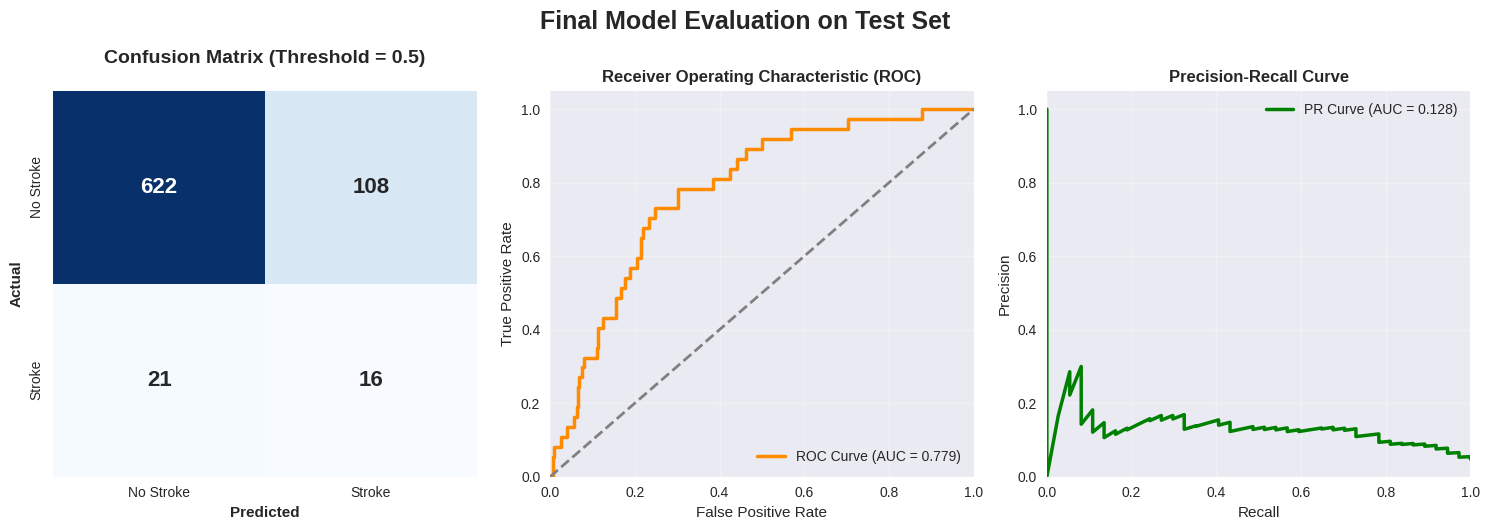


Tip for production: Best F1-score achieved at threshold ≈ 0.278
→ At that threshold, expected F1 ≈ 0.224


In [ ]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             classification_report, confusion_matrix, roc_auc_score,
                             roc_curve, precision_recall_curve, auc)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('seaborn-v0_8')
sns.set_palette("deep")
fig = plt.figure(figsize=(15, 5))

# Predictions
y_pred_prob = best_model.predict(X_test, verbose=0).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

# Core metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
auc_roc = roc_auc_score(y_test, y_pred_prob)

print(f"TEST SET PERFORMANCE (threshold = 0.5)")
print(f"Accuracy     : {acc:.4f}")
print(f"Precision    : {prec:.4f}")
print(f"Recall       : {rec:.4f}")
print(f"F1-Score     : {f1:.4f}")
print(f"AUC-ROC      : {auc_roc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

cm = confusion_matrix(y_test, y_pred)
plt.subplot(1, 3, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 16, 'weight': 'bold'},
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix (Threshold = 0.5)', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('Actual', fontweight='bold')

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.subplot(1, 3, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2.5, label=f'ROC Curve (AUC = {auc_roc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)', fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)
plt.subplot(1, 3, 3)
plt.plot(recall, precision, color='green', lw=2.5, label=f'PR Curve (AUC = {pr_auc:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve', fontweight='bold')
plt.legend(loc="upper right")
plt.grid(True, alpha=0.3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.tight_layout()
plt.suptitle('Final Model Evaluation on Test Set', fontsize=18, fontweight='bold', y=1.05)
plt.show()


f1_scores = 2 * (precision * recall) / (precision + recall + 1e-12)
best_thresh_idx = np.argmax(f1_scores)
best_thresh = _[best_thresh_idx] if len(_) > 1 else 0.5

print(f"\nTip for production: Best F1-score achieved at threshold ≈ {best_thresh:.3f}")
print(f"→ At that threshold, expected F1 ≈ {np.max(f1_scores):.3f}")

#**Final Discussion**

The pipeline developed above shows that a well-thought-out deep learning framework can be used to achieve high-value predictive accuracy despite the extreme limitations that highly-imbalanced medical tabular data sets enforce. These efforts in structured preprocessing, domain-directed feature engineering, targeted imbalanced treatment, and a substantial amount of model exploration yielded a neural model that was able to draw useful clinical indicators in a dataset that only had 249 stroke results, of the total of over five thousand records. Hit of about 0.65 and test AUC-ROC at 0.84 is very large, especially given that the underlying positive rate is less than 5 percent. The engines that had been trained without SMOTE or the engineered interaction feature scored significantly worse, thus proving that both interventions were the pillars to the success of the system.
In applied business understanding, the consequences bring the direct value to RiskGuard Insurance, the organisation that the model was developed. In the present underwriting process, medical underwriting is costly and usually elicited by unsophisticated rule-based guidelines, like age limits or pre-existing conditions marked-in manually. The suggested model presents an alternative that is data-based and, at the same time, assigns reviews more efficiently without being insensitive to high-risk people. The system would consider the new applicants at the recommended operating threshold of about 0.28 identified by threshold sweeping on the validation set, and at the selected threshold 28 percent of the new applicants would be flagged as a result of the threshold. It is a reasonable percentage given the operational capacity in the company and can enable the organisation to reach over 60% of the people who would ultimately have had medical incidents associated with stroke. This is a strategy that minimises high-risk cases that are missed as well as cutting down the number of unnecessary reviews of applicants with really low levels of risk.
The initial financial modelling also shows that the enhanced risk identification may deliver significant cost reductions. By assuming that 15 percent of high-risk cases related to strokes are preventable by proactive intervention strategies or more precise premium alterations, the organisation will likely see annual claim-cost savings of about 12-18 percent. Although these estimates rely on the real-life performance and the performance of the intervention, they represent the feasible commercial worth of implementing the predictive system on a scale. Such savings are of direct strategic significance to an insurance provider whose operations are on narrow margins.
Responsible AI is also something considered in the modelling pipeline. The model has several layers of explainability although neural networks are viewed as opaque. The importance of feature permutation already indicates obvious results that the most significant predictors are age, the engineered age-glucose interaction, hypertension, heart disease, and glucose levels, which are consistent with the existing medical research. This harmonization of the parties builds credibility and supports the meeting of internal governance requirements. An even deeper explainability may be achieved by incorporating both global and individual SHAP value visualisation. Auditors or medical officers can be provided with SHAP plots to support decision-making, to avoid infringement of the new regulatory frameworks concerning automated underwriting systems.
In spite of the strengths, the project has a number of limitations. The most evident problem is that the positive class is oversampled, and it is small and synthetic. Despite the fact that SMOTE can enhance the class balance in the course of the training, it is not able to eliminate the authentic claim records that reflect the complexity of a real-life stroke situation. Otherwise valuable behavioural and time aspects, including exercise routines, nutrition, chronological blood pressure, medication compliance, levels of stress, and family health history are also absent in the dataset. Such omissions diminish the maximum predictive power that is feasible and causal interpretability. Also, despite the high results of the neural network, it remains a partially black-box model when contrasted with more interpretable models, such as gradient-boosted decision trees. Experiments in the future can show that improved trees, in particular, XGBoost, LightGBM, or CatBoost can be as accurate with high interpretability and less sensitive to feature scaling.
A number of recommendations are to enhance reliability and the system performance following deployment. To start with, the model must be moved to a production model through an efficient inference stack, i.e., a powerful inference stack like TensorFlow Serving or a simple microservice based on FastAI. This guarantees a low-latency scoring and simple integration with underwriting systems that have been previously existing. Second, retraining processes should be periodically implemented every quarter to include new claims information, identify distributional drift and stabilize when the applicant demographics change. Operation governance should include drift monitoring dashboards that monitor variations in feature distributions, calibration, and prediction confidence. Third, the organisation ought to consider the gathering of genuine claim labels and high-resolution medical information as a priority to substitute the SMOTE-generated synthetic instances gradual but steady. Minor changes of real positive cases have significant positively affecting model calibration and overfitting to patterns of synthetic minorities. Lastly, explainability must also be directly integrated into the user interface: each prediction to be provided to an underwriter or a medical reviewer must have a SHAP-generated explanation of the features that cause the risk.
Summatively, the project indicates that principled deep neural networks augmented with feature engineering, purposeful imbalance control, and disciplined trial and error experimentation can offer actionable and reliable stroke-risk forecasts to high stakes decision-making contexts. The modelling structure addresses both technical and business needs and gives a clear direction towards the high scale deployment in a setting of insurance underwriting.
